In [14]:
test_data <- read.csv(file="Translation_Test/test_table.csv",head=TRUE,sep=",")

In [15]:
head(test_data)

user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
315281,2015-12-03,Direct,Web,ES,NA,IE,1,0
497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
540675,2015-12-03,Direct,Mobile,ES,NA,Android_App,0,1


In [16]:
user_data <- read.csv(file="Translation_Test/user_table.csv",head=TRUE,sep=",")

In [17]:
head(user_data)

user_id,sex,age,country
765821,M,20,Mexico
343561,F,27,Nicaragua
118744,M,23,Colombia
987753,F,27,Venezuela
554597,F,20,Spain
62371,M,29,Ecuador


In [18]:
test_data$test <- as.factor(test_data$test)

In [19]:
test_data$user_id <- as.factor(test_data$user_id)

In [97]:
test_data$date <- as.Date(test_data$date)

In [98]:
user_data$user_id <- as.factor(user_data$user_id)

In [99]:
library(Hmisc, warn.conflict=FALSE)
describe(test_data)

test_data 

 9  Variables      453321  Observations
--------------------------------------------------------------------------------
user_id 
       n  missing distinct 
  453321        0   453321 

lowest : 1       2       3       5       8      
highest: 999993  999996  999998  999999  1000000
--------------------------------------------------------------------------------
date 
       n  missing distinct 
  453321        0        5 
                                                                 
Value      2015-11-30 2015-12-01 2015-12-02 2015-12-03 2015-12-04
Frequency       71025      70991      70649      99493     141163
Proportion      0.157      0.157      0.156      0.219      0.311
--------------------------------------------------------------------------------
source 
       n  missing distinct 
  453321        0        3 
                               
Value         Ads Direct    SEO
Frequency  181877  90834 180610
Proportion  0.401  0.200  0.398
-----------------------

In [100]:
library(dplyr,warn.conflicts = FALSE)
library(rpart,warn.conflicts = FALSE)
library(ggplot2,warn.conflicts = FALSE)

In [101]:
test_text <- subset(test_data,test==1)

In [102]:
test_con <- subset(test_data,test==0)
conversion_Rate <- sum(test_con$conversion) / nrow(test_con)
conversion_Rate_1 <- mean(test_con$conversion)

In [103]:
data <- merge(test_data, user_data, by="user_id", all.x=TRUE, sort=TRUE)

In [104]:
summary(data)

    user_id            date               source          device      
 1      :     1   Min.   :2015-11-30   Ads   :181877   Mobile:201756  
 2      :     1   1st Qu.:2015-12-01   Direct: 90834   Web   :251565  
 3      :     1   Median :2015-12-03   SEO   :180610                  
 5      :     1   Mean   :2015-12-02                                  
 8      :     1   3rd Qu.:2015-12-04                                  
 11     :     1   Max.   :2015-12-04                                  
 (Other):453315                                                       
 browser_language   ads_channel            browser         conversion     
 EN   : 63137     Bing    : 13689   Android_App:155135   Min.   :0.00000  
 ES   :377547     Facebook: 68425   Chrome     :101929   1st Qu.:0.00000  
 Other: 12637     Google  : 68180   FireFox    : 40766   Median :0.00000  
                  Other   :  4148   IE         : 61715   Mean   :0.04958  
                  Yahoo   : 27435   Iphone_App : 46621   

In [110]:
test_sp <- subset(data, country != "Spain")

In [111]:
describe(test_sp)

test_sp 

 12  Variables      401085  Observations
--------------------------------------------------------------------------------
user_id 
       n  missing distinct 
  401085        0   401085 

lowest : 1       2       3       5       8      
highest: 999993  999996  999998  999999  1000000
--------------------------------------------------------------------------------
date 
       n  missing distinct 
  401085        0        5 
                                                                 
Value      2015-11-30 2015-12-01 2015-12-02 2015-12-03 2015-12-04
Frequency       62826      62835      62420      88110     124894
Proportion      0.157      0.157      0.156      0.220      0.311
--------------------------------------------------------------------------------
source 
       n  missing distinct 
  401085        0        3 
                               
Value         Ads Direct    SEO
Frequency  160800  80285 160000
Proportion  0.401  0.200  0.399
------------------------

In [112]:
compare <- test_sp %>%
group_by (test) %>%
summarise(conversion_rate = mean(conversion))
compare

test,conversion_rate
0,0.04829179
1,0.04341116


In [113]:
data_conversion_country = data %>%
group_by (country) %>%
summarise(conversion = mean(conversion[test == 1])) %>%
arrange(desc(conversion))
data_conversion_country

country,conversion
NA,0.05741627
Costa Rica,0.05473764
Nicaragua,0.05417676
Chile,0.05129502
Mexico,0.05118631
Peru,0.05060427
Colombia,0.05057096
Panama,0.04937028
Paraguay,0.04922910
Ecuador,0.04898842


In [114]:
data_conversion_country = data %>%
group_by (country) %>%
summarise(conversion = mean(conversion[test == 0])) %>%
arrange(desc(conversion))
data_conversion_country

country,conversion
Spain,0.07971882
NA,0.07755102
El Salvador,0.05355404
Nicaragua,0.05264697
Costa Rica,0.05225564
Colombia,0.05208949
Honduras,0.05090576
Guatemala,0.05064288
Venezuela,0.05034367
Peru,0.04991404


In [115]:
t.test(test_sp$conversion[test_sp$test==1], test_sp$conversion[test_sp$test == 0])


	Welch Two Sample t-test

data:  test_sp$conversion[test_sp$test == 1] and test_sp$conversion[test_sp$test == 0]
t = -7.3539, df = 385260, p-value = 1.929e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.006181421 -0.003579837
sample estimates:
 mean of x  mean of y 
0.04341116 0.04829179 


In [116]:
data_test_by_day <- test_sp %>%
group_by(date) %>%
summarize(test_vs_control = mean(conversion[test==1])/mean(conversion[test==0]))
data_test_by_day

date,test_vs_control
2015-11-30,0.8569179
2015-12-01,0.8945240
2015-12-02,0.9121953
2015-12-03,0.8912351
2015-12-04,0.9229847


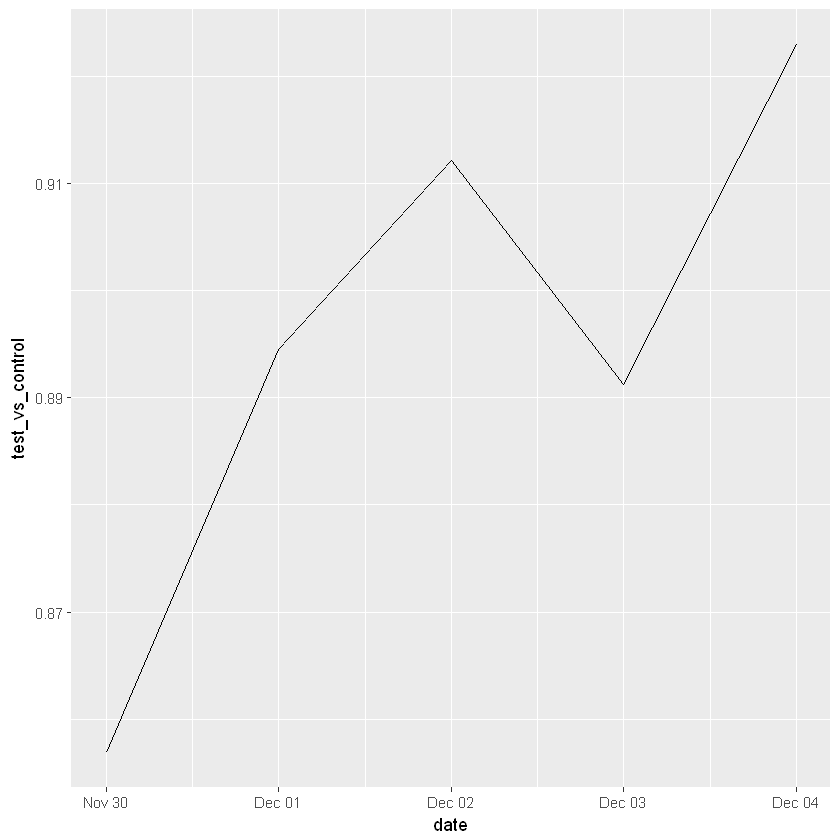

In [117]:
qplot(date,test_vs_control,group=1,data= data_test_by_day, geom="line")

In [119]:
dim(test_sp)

[1] 401085     12

In [120]:
head(test_sp)

user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,2015-12-02,SEO,Web,EN,NA,Chrome,0,0,M,38,Chile
2,2015-11-30,SEO,Mobile,ES,NA,Android_App,0,0,M,27,Colombia
3,2015-12-03,SEO,Mobile,ES,NA,Iphone_App,0,1,M,18,Guatemala
5,2015-11-30,Ads,Web,ES,Facebook,Chrome,0,1,M,22,Argentina
8,2015-12-03,Ads,Mobile,ES,Google,Android_App,0,1,M,19,Venezuela
11,2015-12-03,Ads,Web,ES,Yahoo,Chrome,0,1,F,28,Colombia


#### CART Tree

A decision tree is a classifier that partitions data recursively into to form groups or classes. This is a supervised learning algorithm which can be used in discrete or continuous data for classification or regression. The Algorithm used in the decision trees are ID3 , C4.5, CART, C5.0, CHAID, QUEST, CRUISE, etc. The decision tree consists of nodes that form a rooted tree, meaning it is a directed tree with a node called “root” that has no incoming edges. All other nodes have exactly one incoming edge. A node with outgoing edges is called an internal or test node. All other nodes are called leaves

The splitting of nodes is decided by algorithms like information gain, chi square, gini index.

ID3, or Iternative Dichotomizer, was the first of three Decision Tree implementations developed by Ross Quinlan

It builds a decision tree for the given data in a top-down fashion, starting from a set of objects and a specification of properties Resources and Information. each node of the tree, one property is tested based on maximizing information gain and minimizing entropy, and the results are used to split the object set. This process is recursively done until the set in a given sub-tree is homogeneous (i.e. it contains objects belonging to the same category). The ID3 algorithm uses a greedy search. It selects a test using the information gain criterion, and then never explores the possibility of alternate choices.

Disadvantages

Data may be over-fitted or over-classified, if a small sample is tested.
Only one attribute at a time is tested for making a decision.
Does not handle numeric attributes and missing values.

CART

CART stands for Classification and Regression Trees. It is characterized by the fact that it constructs binary trees, namely each internal node has exactly two outgoing edges. The splits are selected using the twoing criteria and the obtained tree is pruned by cost–complexity Pruning. CART can handle both numeric and categorical variables and it can easily handle outliers.
Disadvantages

It can split on only one variable
Trees formed may be unstable

C4.5

Improved version on ID 3 by Quinlan's. The new features (versus ID3) are: (i) accepts both continuous and discrete features; (ii) handles incomplete data points; (iii) solves over-fitting problem by (very clever) bottom-up technique usually known as "pruning"; and (iv) different weights can be applied the features that comprise the training data.

Disadvantages

C4.5 constructs empty branches with zero values
Over fitting happens when algorithm model picks up data with uncommon characteristics , especially when data is noisy.
The next evolution of this is C5.0.

In [ ]:
tree <- rpart(test ~ ., test_sp[,-8],control = rpart.control(minbucket = nrow(test_sp)/100,maxdepth=2))

tree